## Import libraries

In [1]:
from keras.layers import Input, Dense, Dropout, BatchNormalization, Activation
from keras.models import Model
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
print( "Keras version: " + str(keras.__version__) )

/home/aditya/anaconda3/envs/conda_3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Keras version: 2.1.6


## Load Mnist data

In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print( "Number of train data: "+str(X_train.shape[0]) )
print( "Number of test data:  "+str(X_test.shape[0]) )
print( "\n\nShape of X_train: \t" + str(X_train.shape) )
print( "\nShape of y_train: \t" + str(y_train.shape) )
print( "\nShape of X_test: \t" + str(X_test.shape) )
print( "\nShape of X_test: \t" + str(y_test.shape) )

Number of train data: 50000
Number of test data:  10000


Shape of X_train: 	(50000, 32, 32, 3)

Shape of y_train: 	(50000, 1)

Shape of X_test: 	(10000, 32, 32, 3)

Shape of X_test: 	(10000, 1)


## Visualize data

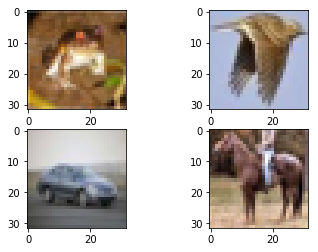

In [25]:
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[123])
plt.subplot(223)
plt.imshow(X_train[31245])
plt.subplot(224)
plt.imshow(X_train[45000])
# show the plot
plt.show()

## Change images from 3D to 1D

In [26]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32')
print( "Shape of train data: \t " + str( X_train.shape ) )
print( "Shape of test data: \t " + str( X_test.shape ) )

Shape of train data: 	 (50000, 3072)
Shape of test data: 	 (10000, 3072)


## Normalize data

In [31]:
# normalize inputs from 0-255 to -1 to 1
X_train = (X_train-128.0) / 128.0
X_test = (X_test-128.0) / 128.0

## Convert y labels to one hot vector

In [28]:
# one hot encode outputs
print( "Original shape of labels data:\t" + str(y_train.shape) )
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print( "Transformed shape of labels data:\t" + str(y_train.shape) )
print( "Number of classes: \t" + str(num_classes) )
print( "Label in one-hot: \t" , y_train[0] )

Original shape of labels data:	(50000, 1)
Transformed shape of labels data:	(50000, 10)
Number of classes: 	10
Label in one-hot: 	 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [29]:
def plotHistory(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## Model 1:  No hidden layer : Train time ~ 2-5s

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Train on 33500 samples, validate on 16500 samples
Epoch 1/30
33500/33500 [==============================] - 1s 44us/step - loss: 1.9900 - acc: 0.3050 - val_loss: 1.9544 - val_acc: 0.3185
Epoch 2/30
33500/33500 [==============================] - 1s 22us/step - loss: 1.8553 - acc: 0.3554 - val_loss: 1.8783 - val_acc: 0.3428
Epoch 3/30
33500/33500 [==============================] - 1s 20us/step - loss: 1.8152 - acc: 0.3701 - val_loss: 1.8615 - val_acc: 0.3627
Epoch 4/30
33500/33500 [==============================] - 1s 22us/step - 

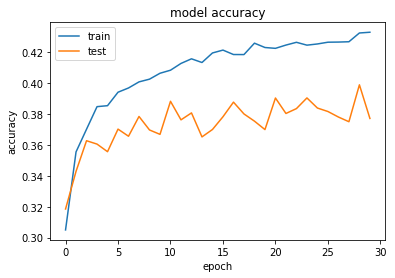

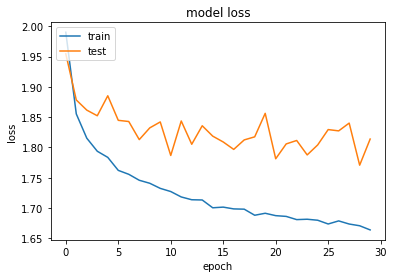

Error: 62.23%
Accuracy: 37.77%


In [30]:
def getModel1():
    inputs = Input(shape=(3072,))
    predictions = Dense(10, activation='softmax')(inputs)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model1 = getModel1()
model1.summary()

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=1000, verbose=1)
# Final evaluation of the model
scores_1 = model1.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Error: %.2f%%" % (100-scores_1[1]*100))
print("Accuracy: %.2f%%" % (scores_1[1]*100))

## Model 2: Model :
    2 hidden layer + Dropout + Batch Normalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               393344    
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
__________

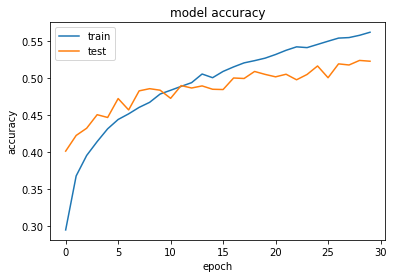

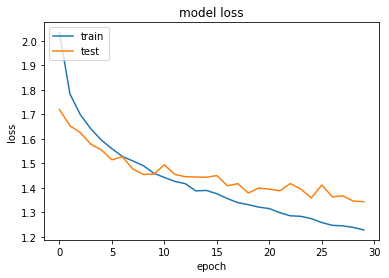

Error: 47.53%
Accuracy: 52.47%


In [19]:
    
def getModel2():
    inputs = Input(shape=(3072,))
    
    x = Dense(128, activation=None)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    
    x = Dense(128, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)
    
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model2 = getModel2()
model2.summary()

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model2.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_2 = model2.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Error: %.2f%%" % (100-scores_2[1]*100))
print("Accuracy: %.2f%%" % (scores_2[1]*100))

# Model:
    5 hidden layers network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_19 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_19 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
__________

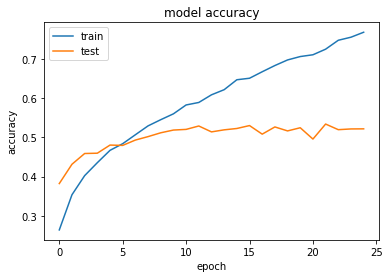

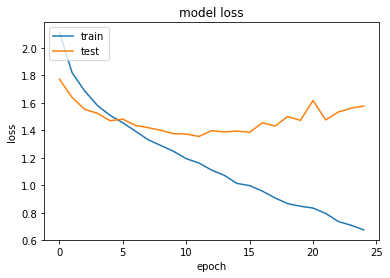

Error: 47.73%
Accuracy: 52.27%


In [22]:
def getModel3():
    inputs = Input(shape=(3072,))
    
    x = Dense(1024, activation=None)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
#     x = Dropout(0.4)(x)
    
    x = Dense(256, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)

    x = Dense(128, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)

    x = Dense(64, activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Dropout(0.3)(x)

    
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)
    return model
model3 = getModel3()
model3.summary()

model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model3.fit(X_train, y_train, validation_split=0.33, epochs=25, batch_size=1000, verbose=2)
# Final evaluation of the model
scores_3 = model3.evaluate(X_test, y_test, verbose=0)
plotHistory(history)
print("Error: %.2f%%" % (100-scores_3[1]*100))
print("Accuracy: %.2f%%" % (scores_3[1]*100))